   Unnamed: 0 Country/Region  Confirmed Deaths  Recovered  Active  New cases  \
0           0    Afghanistan      36263   1269      25198    9796      106.0   
1           1        Albania       4880    144       2745    1991      117.0   
2           2        Algeria      27973   1163      18837    7973      616.0   
3           3        Andorra        907     52        803      52       10.0   
4           4         Angola        950     41        242     667       18.0   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0        10.0             18                3.50                  69.49   
1         6.0             63                2.95                  56.25   
2         8.0            749                4.16                  67.34   
3         0.0              0                5.73                  88.53   
4         1.0              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0  

C:\Users\Fattani Computers\AppData\Local\Temp\ipykernel_9588\1642548650.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Deaths'].fillna(df['Deaths'].mean(), inplace=True)


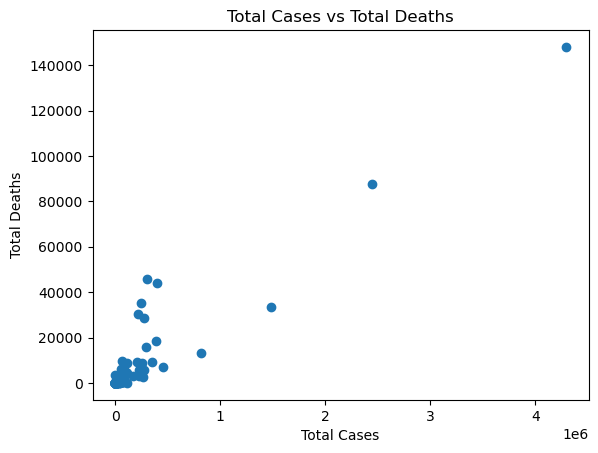

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("covid_19_country_wise_latest.csv")

# Display first 5 rows
print(df.head())

# Set index and rename it
df.set_index("Unnamed: 0", inplace=True)
df.index.name = "index"

# Function to replace whitespace with underscores in column names
def clean_column_names(dataframe):
    dataframe.columns = dataframe.columns.str.replace(" ", "_")
    return dataframe

df = clean_column_names(df)

# Check basic info
print(df.info())
print(df.isnull().sum())  # Missing values

# Fill NaN values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Count unique countries
print("Unique countries:", df['Country/Region'].nunique())

# Check for duplicates and remove if found
df = df.drop_duplicates(subset=['Country/Region'])

# Convert Deaths column to numeric (handle strings)
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Deaths'].fillna(df['Deaths'].mean(), inplace=True)
df['Deaths'] = df['Deaths'].astype(int)

# Calculate mean, median, std of total cases
print("Mean Total Cases:", df['Confirmed'].mean())
print("Median Total Cases:", df['Confirmed'].median())
print("Standard Deviation Total Cases:", df['Confirmed'].std())

# Calculate total deaths and recoveries
total_deaths = df['Deaths'].sum()
total_recoveries = df['Recovered'].sum()
print("Total Deaths:", total_deaths)
print("Total Recoveries:", total_recoveries)

# Count countries with more than 1M cases
high_case_countries = df[df['Confirmed'] > 1_000_000]
print("Countries with >1M cases:", high_case_countries.shape[0])

# Countries with recovery rate >95%
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed']) * 100
high_recovery_countries = df[df['Recovery_Rate'] > 95]
print("Countries with >95% Recovery Rate:", high_recovery_countries['Country/Region'].tolist())

# Country with max deaths
max_deaths_country = df.loc[df['Deaths'].idxmax(), 'Country/Region']
print("Country with max deaths:", max_deaths_country)

# Sort countries by deaths
df_sorted = df.sort_values(by='Deaths', ascending=False)

# Create Total_cases column
df['Total_cases'] = df['Deaths'] + df['Recovered'] + df['Active']

# Calculate Death Rate
df['Death_Rate'] = (df['Deaths'] / df['Total_cases']) * 100

# Identify countries where cases increase but death rate is low
if 'Confirmed_last_week' in df.columns:
    low_death_rate_countries = df[(df['Confirmed_last_week'] < df['Confirmed']) & (df['Death_Rate'] < 2)]
    print("Countries with increasing cases but low death rates:", low_death_rate_countries['Country/Region'].tolist())
else:
    print("Column 'Confirmed last week' not found.")

# Print selected columns
df_subset = df[['Country/Region', 'Death_Rate']]
print(df_subset.head())

# Scatter plot: Total Cases vs Total Deaths
plt.scatter(df['Confirmed'], df['Deaths'])
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.title("Total Cases vs Total Deaths")
plt.show()

# Drop WHO Region and Confirmed columns after all calculations
df.drop(columns=['WHO_Region', 'Confirmed'], inplace=True)

# Save updated dataset
df.to_csv("updated_covid_data.csv")
